In [1]:
# Name: example_basic
# Authors: Stephan Meighen-Berger
# A basic example how to use the package

In [2]:
# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
sys.path.append("../")
from pone_dm import PDM, config

In [3]:
# picture path
PICS = '../pics/'

In [4]:
# Some example settings
config['atmospheric showers']['interaction model'] = 'SIBYLL2.3c'
config['atmospheric showers']['theta angles'] = np.array([0., 5., 10., 20., 30., 45., 60., 70., 90.])

In [5]:
pdm = PDM()

In [6]:
# Grids
mass_grid = np.logspace(3, 6, 10)
sv_grid = np.logspace(-26, -23, 10)
pdm.limit_calc(mass_grid=mass_grid, sv_grid=sv_grid[::-1])

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:312: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\limit_calc.py:107: RuntimeWarning: invalid value encountered in true_divide
  (self._signal_calc(self._egrid, mass,
C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:313: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:00<00:00, 12.02s/it]


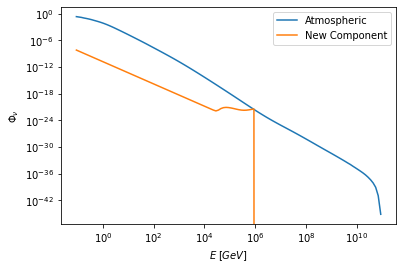

In [7]:
# Particle fluxes
plt.plot(pdm._shower_sim.egrid, pdm._shower_sim.flux_results[0.]["numu"], label='Atmospheric')
plt.plot(pdm._shower_sim.egrid, pdm._limit_calc._extra_flux, label='New Component')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E\;[GeV]$")
plt.ylabel(r"$\Phi_\nu$")
plt.legend()

In [8]:
# Loading comparison data
cl_lit = np.loadtxt('../Data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

C:\Users\steph\AppData\Local\Temp/ipykernel_7976/1298138021.py:2: UserWarning: No contour levels were found within the data range.
  plt.contour(mass_grid, sv_grid, 1 - pdm.results, levels = [0.9, 1])
C:\Users\steph\AppData\Local\Temp/ipykernel_7976/1298138021.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(mass_grid, sv_grid, 1 - pdm.results, cmap = plt.cm.Accent)


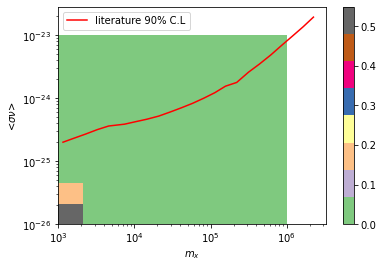

In [37]:
# Limits
plt.contour(mass_grid, sv_grid, 1 - pdm.results, levels = [0.9, 1])
plt.pcolor(mass_grid, sv_grid, 1 - pdm.results, cmap = plt.cm.Accent)
plt.plot(cl_lit[:, 0], cl_lit[:, 1], 'r', label='literature 90% C.L')
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel(r"$m_{x}$")
plt.ylabel(r"<$\sigma \nu$>")
plt.legend()

In [33]:
def test_func(energy, scaling):
    egrid = pdm._shower_sim.egrid
    t_d = pdm._limit_calc._find_nearest(egrid, 5e2)
    test = ((
        pdm._limit_calc._signal_calc(egrid, energy, scaling, config['atmospheric showers']['theta angles'])**2.)[:t_d] /
        pdm._limit_calc._numu_bkgrd[:t_d]
    )
    return chi2.sf(np.sum(np.nan_to_num(test)), 2)

In [ ]:
def test_func(energy, scaling):
    egrid = pdm._shower_sim.egrid
    t_d = pdm._limit_calc._find_nearest(egrid, 5e2)
    test = ((
        pdm._limit_calc._signal_calc(egrid, energy, scaling, config['atmospheric showers']['theta angles'])**2.)[:t_d] /
        pdm._limit_calc._numu_bkgrd[:t_d]
    )
    return chi2.sf(np.sum(np.nan_to_num(test)), 2)

C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:312: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
C:\Users\steph\AppData\Local\Temp/ipykernel_7976/1308442334.py:4: RuntimeWarning: invalid value encountered in true_divide
  test = ((
C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:313: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:312: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
C:\Users\steph\AppData\Local\Temp/ipykernel_7976/1308442334.py:4: RuntimeWarning: invalid value encountered in true_divide
  test = ((
C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:313: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:312: RuntimeWarning: ov

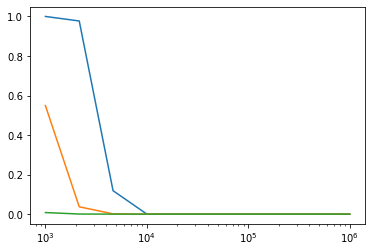

In [39]:
plt.semilogx(mass_grid, 1. - np.array([test_func(mass, 1e-22) for mass in mass_grid]))
plt.semilogx(mass_grid, 1. - np.array([test_func(mass, 1e-23) for mass in mass_grid]))
plt.semilogx(mass_grid, 1. - np.array([test_func(mass, 1e-24) for mass in mass_grid]))

In [32]:
1. - np.array([test_func(mass) for mass in mass_grid])

C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:312: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
C:\Users\steph\AppData\Local\Temp/ipykernel_7976/62875723.py:4: RuntimeWarning: invalid value encountered in true_divide
  test = ((
C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:313: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd


array([1.        , 1.        , 1.        , 0.54463686, 0.10200734,
       0.04871414, 0.02291381, 0.01070172, 0.00498162, 0.00231536])

In [35]:
egrid = pdm._shower_sim.egrid
t_d = pdm._limit_calc._find_nearest(egrid, 5e2)
np.sum(np.nan_to_num(
    pdm._limit_calc._signal_calc(egrid, 1e3, 1e-26,
                                 config['atmospheric showers']['theta angles'])**2.)
      )

C:\Users\steph\OneDrive\Documents\GitHub\pone_dm\notebooks\..\pone_dm\dm2nu.py:312: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)


0.003373769313290351